In [6]:
from pathlib import Path
import fitz  # PyMuPDF
from IPython.display import Image, display


def inspect_single_page_pdf(pdf_path):
  """
  Print extracted text and display all images
  from a single-page PDF (page index 0).
  """
  pdf_path = Path(pdf_path)

  doc = fitz.open(pdf_path)
  page = doc.load_page(0)

  # ---- TEXT ----
  print("===== TEXT =====")
  text = page.get_text()
  print(text if text.strip() else "[No extractable text]")

  # ---- IMAGES ----
  print("\n===== IMAGES =====")
  images = page.get_images(full=True)

  if not images:
    print("[No images found]")
  else:
    for i, img in enumerate(images, start=1):
      xref = img[0]
      pix = fitz.Pixmap(doc, xref)

      # Ensure PNG-safe RGB
      if pix.colorspace is None or pix.colorspace.n != 3:
        pix = fitz.Pixmap(fitz.csRGB, pix)

      print(f"Image {i}: {pix.width}x{pix.height}")
      display(Image(data=pix.tobytes("png")))

      pix = None

  doc.close()

===== TEXT =====
2
Radha Krishna
amYm {H«$îZm
All Designs Are Available in Customizd Size
7121
7120
7119
7118
7117
7116
ART
POSTER


===== IMAGES =====
Image 1: 216x144


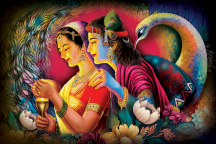

Image 2: 216x144


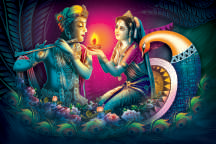

Image 3: 216x144


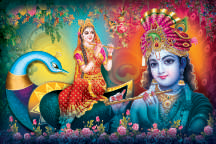

Image 4: 216x144


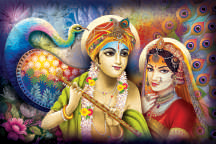

Image 5: 216x144


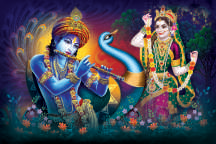

Image 6: 216x144


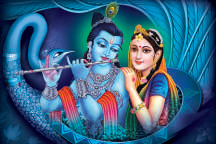

In [7]:
inspect_single_page_pdf(
    "data/test/01_Radha_Krishna_Art_Poster--2.pdf"
)

===== TEXT =====
Size     :
Material :
No    :
All Designs are Available in Customized Size
Crystal /Canvas/Paper Sparkle /
Vinyl Sparkle/Translight
R-14070
RAM


===== IMAGES =====
Image 1: 577x399


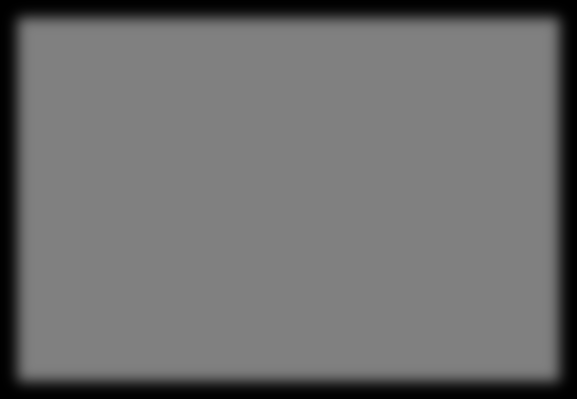

Image 2: 577x399


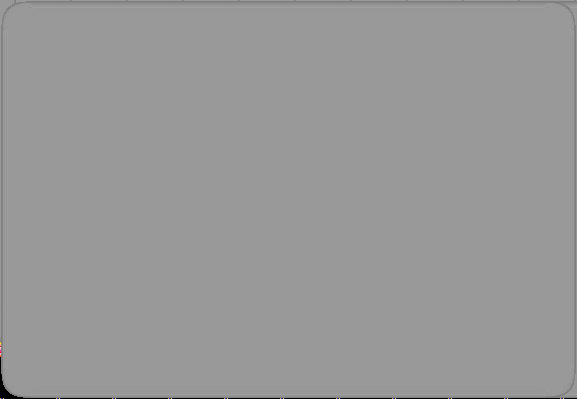

Image 3: 345x517


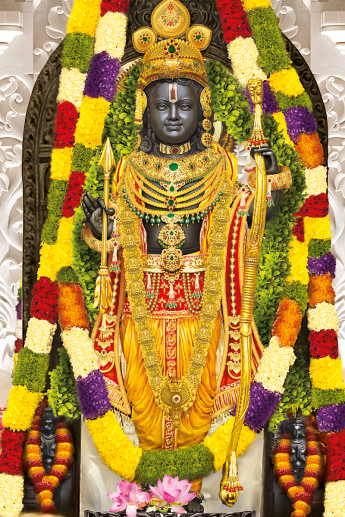

In [8]:
inspect_single_page_pdf(
    "data/test/02_Ram_Catalogue_PDF_Brochure--1.pdf"
)

===== TEXT =====
Size     :
Material :
No    :
12x18, 16x24, 18x24, 20x30
Texture Print, Sparkle Print & Canvas
24000


===== IMAGES =====
Image 1: 705x470


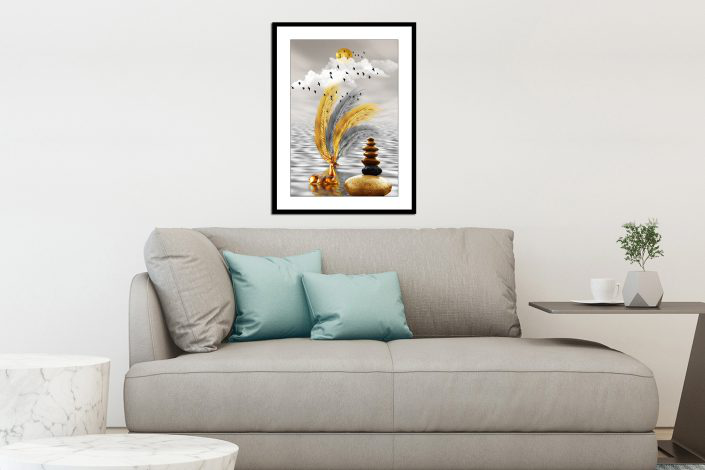

In [9]:
inspect_single_page_pdf(
    "data/test/31_Chinese_Scenery_Modern_Art_Poster--2.pdf"
)

===== TEXT =====
Size     :
Material :
No    :
12x18
Texture Print, Sparkle Print & Canvas
10001


===== IMAGES =====
Image 1: 354x531


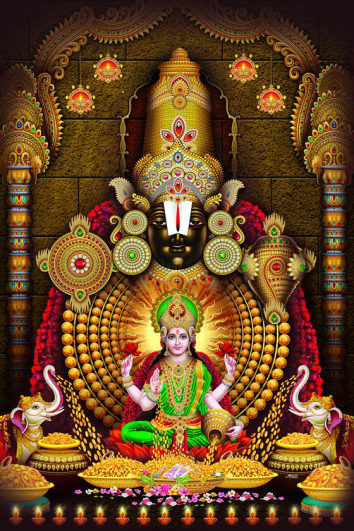

In [10]:
inspect_single_page_pdf(
    "data/test/45_Tirupati_Balaji_Art_Poster--1.pdf"
)